In [1]:
# Let's download the mnist dataset
from sklearn.datasets import fetch_openml

# Download the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Access the data and labels
data = mnist.data
labels = mnist.target


# https://github.com/zalandoresearch/fashion-mnist Use this instead...

In [7]:
import numpy as np

In [8]:
# Let's extract the indices where labels is 3
indices_3 = np.where(labels == '3')
indices_7 = np.where(labels == '7')

In [14]:
# Get the datapoints from data corresponding to the indices in the arra indices_3
data_3 = data.iloc[indices_3]
data_7 = data.iloc[indices_7]

In [24]:
# Remove all pixels that are always zero
data_3 = data_3.loc[:, (data_3 != 0).any(axis=0)]
data_7 = data_7.loc[:, (data_7 != 0).any(axis=0)]

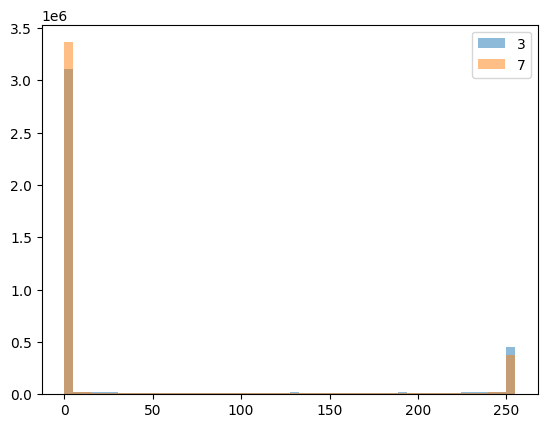

In [26]:
# How can I quantify the data distribution?

# Let's plot the distribution of the data
import matplotlib.pyplot as plt

# Plot the distribution of the data
plt.hist(data_3.values.flatten(), bins=50, alpha=0.5, label='3')
plt.hist(data_7.values.flatten(), bins=50, alpha=0.5, label='7')
plt.legend(loc='upper right')
plt.show()

Sparsity with L1 penalty: 80.71%
Test score with L1 penalty: 0.8339
Example run in 10.236 s


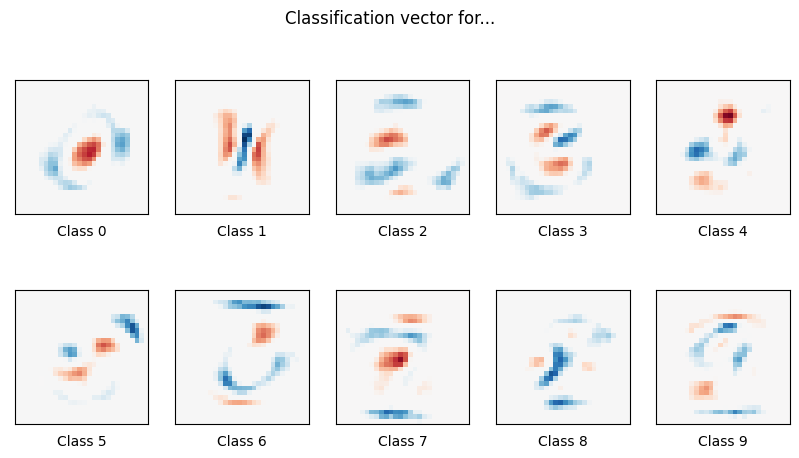

In [3]:
# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False
)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()